<a href="https://colab.research.google.com/github/nischitabiradar/Google-Play-Store-Classification-Project/blob/main/LogisticRegression_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have used Playstore from Kaggle Database ( https://www.kaggle.com/datasets/lava18/google-play-store-apps )

STEPS:

1.Import required Packages

2.Load Dataset

3.Data Visualization

4.We have tried to use Label Encoding and Dummy Encoding

5.Data Processing ( Dropping missing values and creating feature and target dataframes)

6.Constructing Train, Validation and Test sets

7.Building Logistic Model (Model 1 and Testing on Validation Set)

8.Building another Logistic Regression Model and testing results on Validation Sets

9.Finalising the Model and Testing on Test dataset

10.Summarizing Results

In [ ]:
#Importing necessary packages and libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_fscore_support,
    precision_score, recall_score, f1_score,
    roc_curve, auc, precision_recall_curve
)
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Reading in Data
file_path = '/content/googleplaystore.csv'
df = pd.read_csv(file_path)
df['Target'] = (df['Type'] == 'Free').astype(int)

In [ ]:
#Viewing first five rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Target
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [ ]:
#Checking datatypes of each columns
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Target              int64
dtype: object

In [ ]:
df.dropna(inplace=True) #For visualization purpose

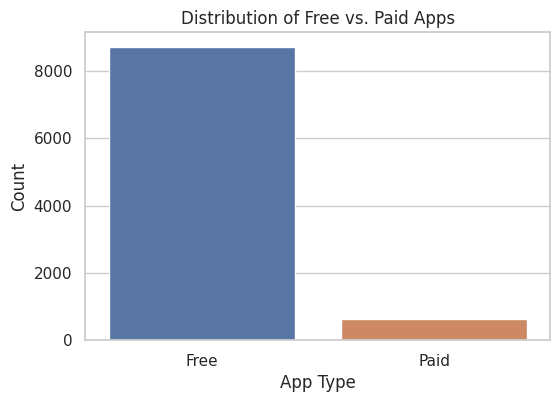

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of Free vs. Paid Apps
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Type')
plt.title('Distribution of Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Count')
plt.show()


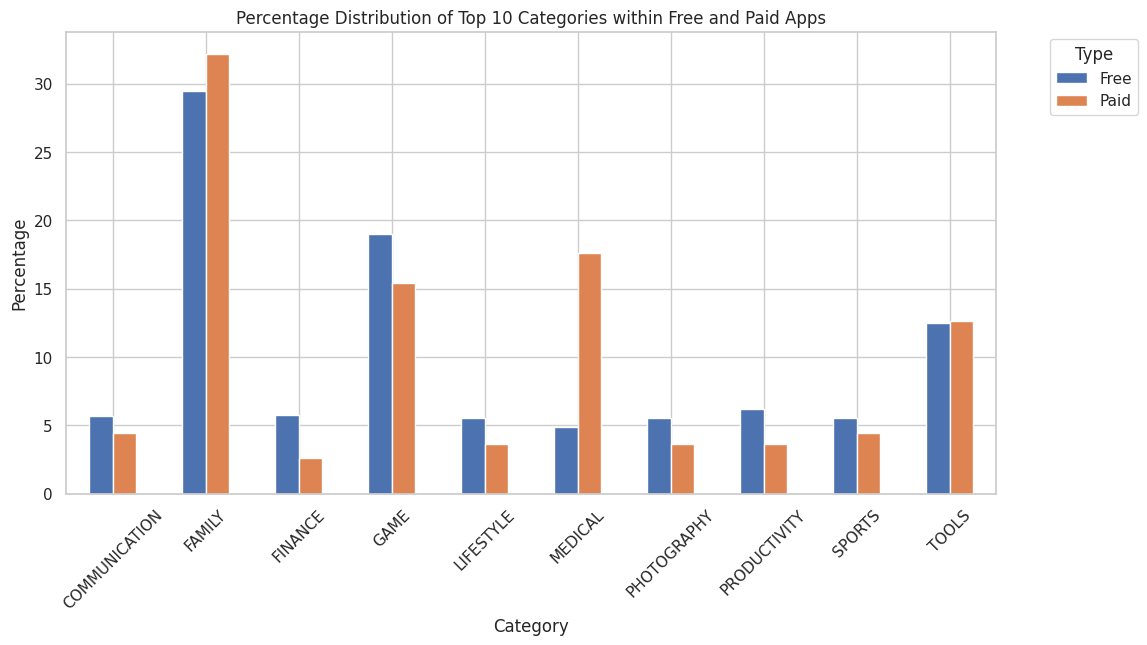

In [ ]:
# Calculating the percentage of each category within free and paid apps separately
category_percentage = df[df['Category'].isin(top_10_categories)].groupby(['Type', 'Category']).size().unstack()
category_percentage = category_percentage.div(category_percentage.sum(axis=1), axis=0) * 100

# Creating the plot
plt.figure(figsize=(12, 6))
category_percentage.T.plot(kind='bar', ax=plt.gca())
plt.title('Percentage Distribution of Top 10 Categories within Free and Paid Apps')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


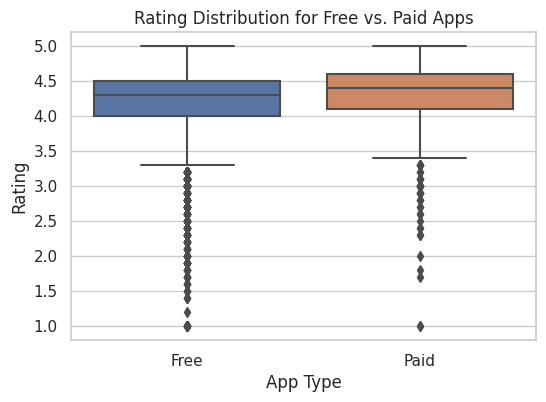

In [ ]:
# Rating Distribution for Free vs. Paid Apps
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Type', y='Rating')
plt.title('Rating Distribution for Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()


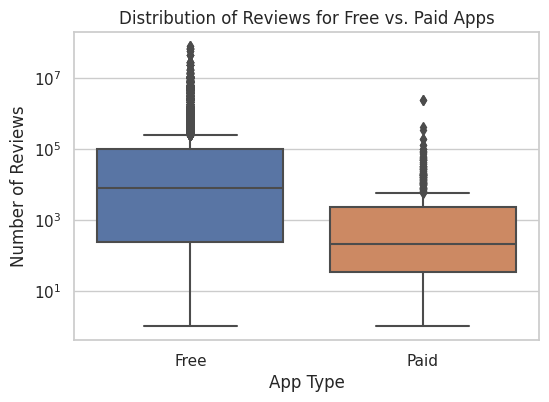

In [ ]:
# Convert 'Reviews' to numeric for visualization
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Distribution of Reviews for Free vs. Paid Apps
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Type', y='Reviews')
plt.title('Distribution of Reviews for Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Number of Reviews')
plt.yscale('log')  # Using log scale due to wide range of values
plt.show()


<ipython-input-509-e1fd38044182>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')


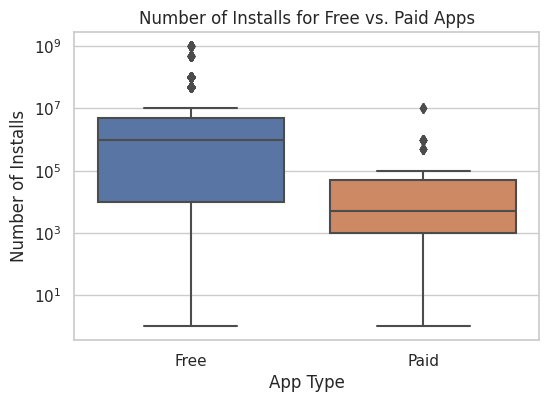

In [ ]:
# Cleaning and converting 'Installs' to numeric
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Number of Installs for Free vs. Paid Apps
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Type', y='Installs')
plt.title('Number of Installs for Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Number of Installs')
plt.yscale('log')  # Using log scale due to wide range of values
plt.show()


**Reload Dataset for Model Evaluation - Since we modified our data for visualization**

In [ ]:
#Reading in Data
file_path = '/content/googleplaystore.csv'
df = pd.read_csv(file_path)
df['Target'] = (df['Type'] == 'Free').astype(int)

In [ ]:
#Accessing Unique Content Ratings
unique_content_ratings = df['Content Rating'].unique()
print(unique_content_ratings)

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'
 nan]


In [ ]:
#Label Encoding Content Rating Column

le = LabelEncoder()

# Replace NaN values with a placeholder or handle them according to your needs
df['Content Rating'].fillna('na', inplace=True)

# Apply label encoding to the 'Content Rating' column
df['Content Rating Encoded'] = le.fit_transform(df['Content Rating'])

# Display the mapping between original values and encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Display the DataFrame with the new encoded column
print(df[['Content Rating', 'Content Rating Encoded']])

Label Mapping: {'Adults only 18+': 0, 'Everyone': 1, 'Everyone 10+': 2, 'Mature 17+': 3, 'Teen': 4, 'Unrated': 5, 'na': 6}
      Content Rating  Content Rating Encoded
0           Everyone                       1
1           Everyone                       1
2           Everyone                       1
3               Teen                       4
4           Everyone                       1
...              ...                     ...
10836       Everyone                       1
10837       Everyone                       1
10838       Everyone                       1
10839     Mature 17+                       3
10840       Everyone                       1

[10841 rows x 2 columns]


In [ ]:
#Accessing Unique Categories
unique_category = df['Category'].unique()
print(unique_category)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [ ]:
#Label Encoding Category Column
df['Category'].fillna('na', inplace=True)
le_category = LabelEncoder()

df['Category Encoded'] = le_category.fit_transform(df['Category'])

category_mapping = dict(zip(le_category.classes_, le_category.transform(le_category.classes_)))
print("Category Mapping:", category_mapping)

print(df[['Category', 'Category Encoded']])

Category Mapping: {'1.9': 0, 'ART_AND_DESIGN': 1, 'AUTO_AND_VEHICLES': 2, 'BEAUTY': 3, 'BOOKS_AND_REFERENCE': 4, 'BUSINESS': 5, 'COMICS': 6, 'COMMUNICATION': 7, 'DATING': 8, 'EDUCATION': 9, 'ENTERTAINMENT': 10, 'EVENTS': 11, 'FAMILY': 12, 'FINANCE': 13, 'FOOD_AND_DRINK': 14, 'GAME': 15, 'HEALTH_AND_FITNESS': 16, 'HOUSE_AND_HOME': 17, 'LIBRARIES_AND_DEMO': 18, 'LIFESTYLE': 19, 'MAPS_AND_NAVIGATION': 20, 'MEDICAL': 21, 'NEWS_AND_MAGAZINES': 22, 'PARENTING': 23, 'PERSONALIZATION': 24, 'PHOTOGRAPHY': 25, 'PRODUCTIVITY': 26, 'SHOPPING': 27, 'SOCIAL': 28, 'SPORTS': 29, 'TOOLS': 30, 'TRAVEL_AND_LOCAL': 31, 'VIDEO_PLAYERS': 32, 'WEATHER': 33}
                  Category  Category Encoded
0           ART_AND_DESIGN                 1
1           ART_AND_DESIGN                 1
2           ART_AND_DESIGN                 1
3           ART_AND_DESIGN                 1
4           ART_AND_DESIGN                 1
...                    ...               ...
10836               FAMILY                

We use dummy encoding as the dtypes of multiple features is object.

In [ ]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')


df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

df['Size'] = df['Size'].str.replace('M', 'e+6').str.replace('k', 'e+3')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')




df['Android Ver'] = df['Android Ver'].astype(str)

df['Android Ver'] = df['Android Ver'].str.extract('(\d+\.\d+)').astype(float)

df['Content Rating Encoded'] = pd.to_numeric(df['Content Rating Encoded'])
df['Category Encoded'] = pd.to_numeric(df['Category Encoded'])



#Not useful since most have more than 40 unique values/ irrelevant to our target variable
df = df.drop(['Last Updated', 'Current Ver', 'Genres', 'App', 'Category','Content Rating','Type'], axis=1)

<ipython-input-515-ca544c3d63ce>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '')
<ipython-input-515-ca544c3d63ce>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [ ]:
#Datatypes in our final Dataframe
df.dtypes

Rating                    float64
Reviews                   float64
Size                      float64
Installs                  float64
Price                     float64
Android Ver               float64
Target                      int64
Content Rating Encoded      int64
Category Encoded            int64
dtype: object

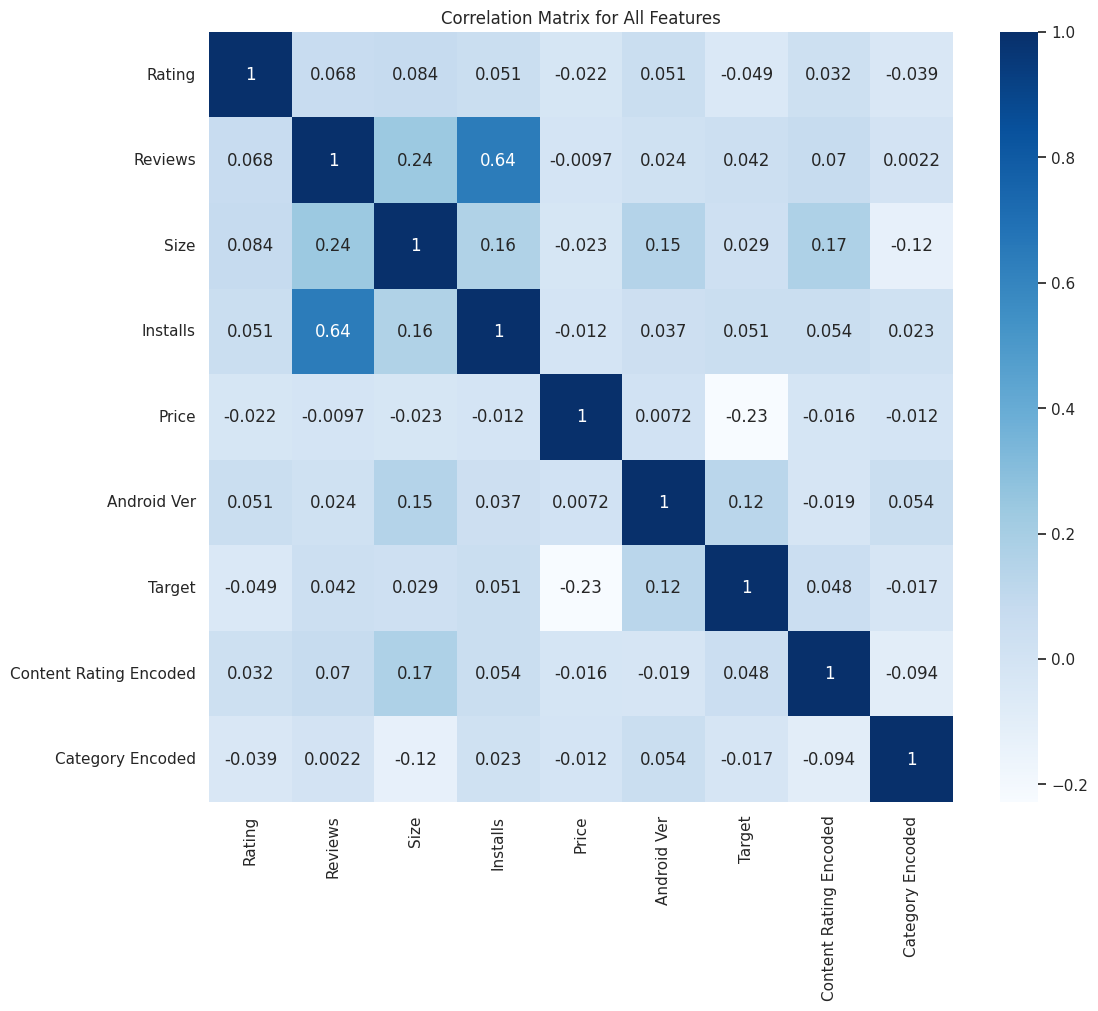

In [ ]:
#Constructing Correlation Matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
custom_cmap = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap)
plt.title('Correlation Matrix for All Features')
plt.show()

In [ ]:
#Dropping any missing values
df.dropna(inplace = True)

We are compelled to eliminate any null values or impute them with the mean values. Given the expansive nature of our dataset, we are fortunate to retain a substantial volume of data for the training of our model.

In [ ]:
#Subsetting Dataframe to create feature and target dataframe
X = df.drop('Target', axis=1)
y = df['Target']

In [ ]:
#Constructing Train, Validation and Test Sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
#Viewing Class Distribution of Each Set
print("Training Set Class Distribution:")
print(y_train.value_counts())

print("Training Set Class Distribution:")
print(y_val.value_counts())

print("\nTesting Set Class Distribution:")
print(y_test.value_counts())


Training Set Class Distribution:
1    4971
0     398
Name: Target, dtype: int64
Training Set Class Distribution:
1    1071
0      80
Name: Target, dtype: int64

Testing Set Class Distribution:
1    1053
0      98
Name: Target, dtype: int64


**Model1 - Logistic Regression** (Validation Testing)

In [ ]:
model1 = make_pipeline(LogisticRegression(solver='liblinear'))

In [ ]:
model1.fit(X_train, y_train)

Pipeline(steps=[('logisticregression', LogisticRegression(solver='liblinear'))])

In [ ]:
#Testing results on Validation Set
val_predictions = model1.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.9304952215464813


In [ ]:
#Classification Report for Validation Set(Model1)
print(classification_report(y_val, val_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.93      1.00      0.96      1071

    accuracy                           0.93      1151
   macro avg       0.47      0.50      0.48      1151
weighted avg       0.87      0.93      0.90      1151



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Precision, Recall and F1 score for Validation Set (Model1)
precision = precision_score(y_val, val_predictions, average='weighted', zero_division=1)
recall = recall_score(y_val, val_predictions, average='weighted', zero_division=1)
f1 = f1_score(y_val, val_predictions, average='weighted', zero_division=1)

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Precision: 0.935326135774354, Recall: 0.9304952215464813, F1 Score: 0.8969940434529987


Model is performing very well for class 1 but is not predicting class 0 correctly.

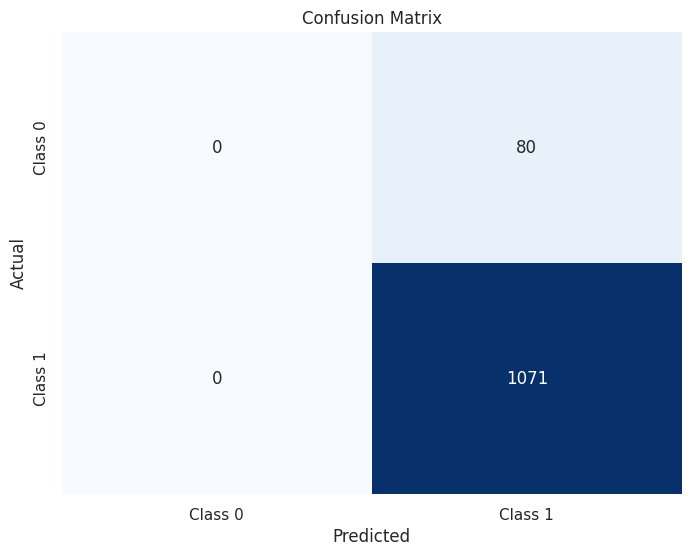

In [ ]:
#Plotting Confusion Matrix (Validation Set Model 1)
conf_matrix = confusion_matrix(y_val, val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

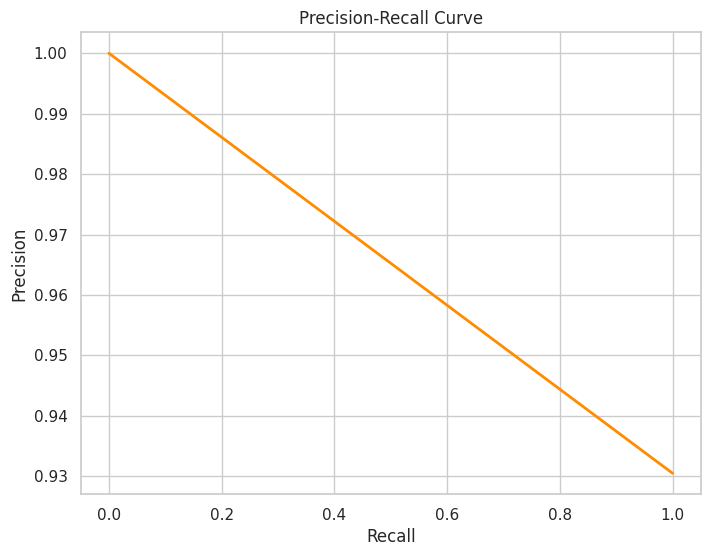

In [ ]:
precision, recall, _ = precision_recall_curve(y_val, val_predictions)

# Create a precision-recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

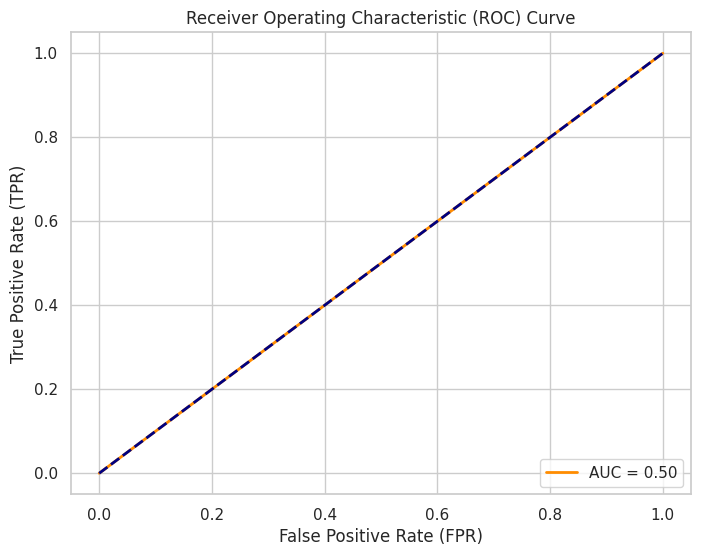

In [ ]:
fpr, tpr, _ = roc_curve(y_val, val_predictions)
roc_auc = auc(fpr, tpr)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Model2 - Logistic Regression with StandardScaler** (Validation Testing)

In [ ]:
model2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', solver='liblinear')
)

In [ ]:
model2.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [ ]:
#Validation Set Predictions and Accuracy (Model2)
val_predictions2 = model2.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions2)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.9721980886185926


In [ ]:
#Classification Report for Validation Set (Model2)
print(classification_report(y_val, val_predictions2))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        80
           1       0.97      1.00      0.99      1071

    accuracy                           0.97      1151
   macro avg       0.99      0.80      0.87      1151
weighted avg       0.97      0.97      0.97      1151



In [ ]:
#Precision, Recall and F1 scores for Validation Set (Model2)
precision = precision_score(y_val, val_predictions2, average='weighted', zero_division=1)
recall = recall_score(y_val, val_predictions2, average='weighted', zero_division=1)
f1 = f1_score(y_val, val_predictions2, average='weighted', zero_division=1)

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Precision: 0.9730046717230395, Recall: 0.9721980886185926, F1 Score: 0.9689274635791284


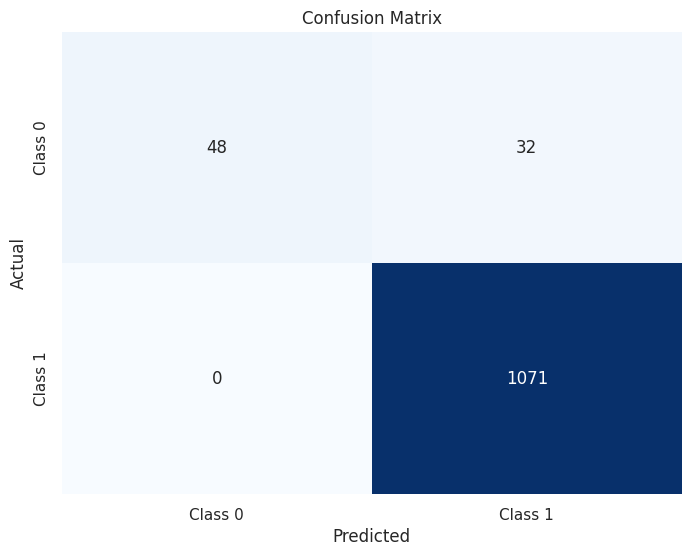

In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_val, val_predictions2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

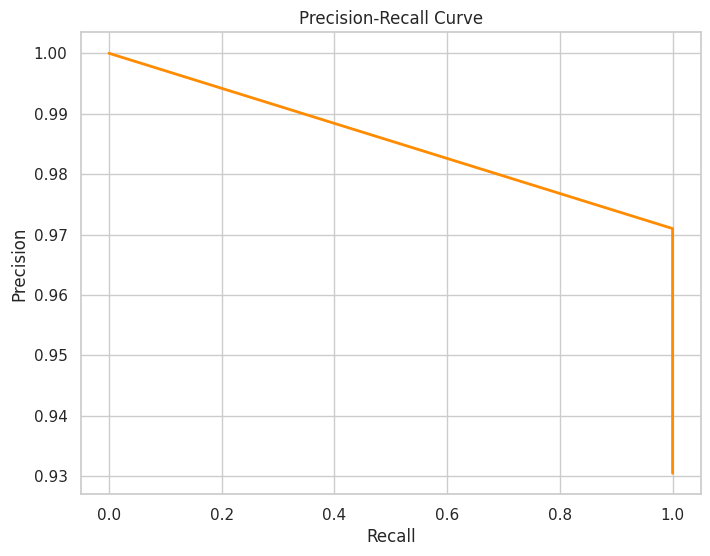

In [ ]:
precision, recall, _ = precision_recall_curve(y_val, val_predictions2)

# Create a precision-recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

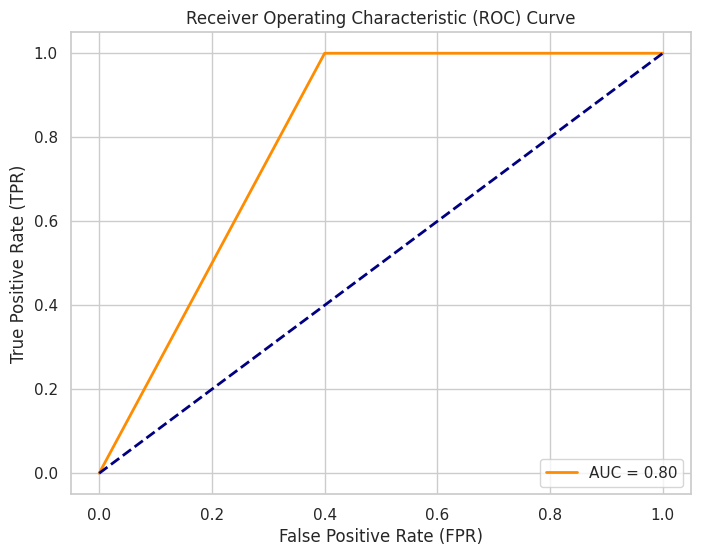

In [ ]:
fpr, tpr, _ = roc_curve(y_val, val_predictions2)
roc_auc = auc(fpr, tpr)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Happier with Model2 (Which involves Standard Scaler) AUC is 0.80 compared to 0.50 in Model 1, Hence we will use Model 2 as our final model for our Test Data**




**Final Model - Testing Results**

In [ ]:
#Test Data Predictions and Accuracy
y_pred = model2.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9721980886185926


In [ ]:
#Classification Report Test Data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        98
           1       0.97      1.00      0.99      1053

    accuracy                           0.97      1151
   macro avg       0.99      0.84      0.89      1151
weighted avg       0.97      0.97      0.97      1151



In [ ]:
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Precision: 0.9730180528252331, Recall: 0.9721980886185926, F1 Score: 0.969693766226254


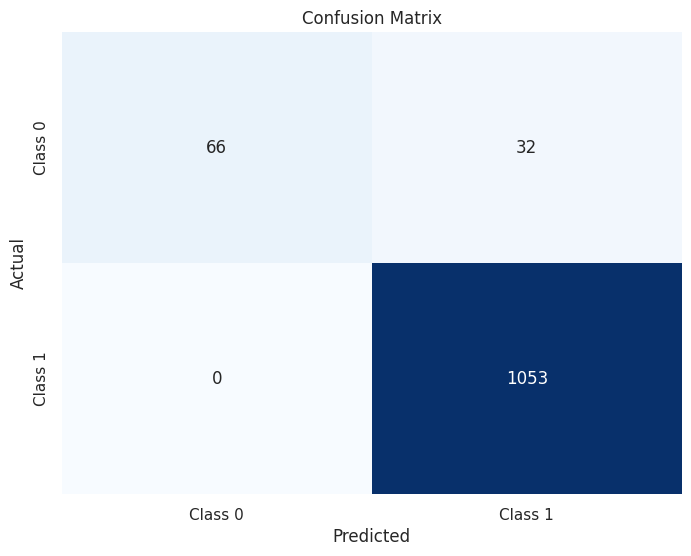

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Here, as you can see False Positive and False Negatives are reduced significantly!Also, True Positive and True Negatives are increased too!**

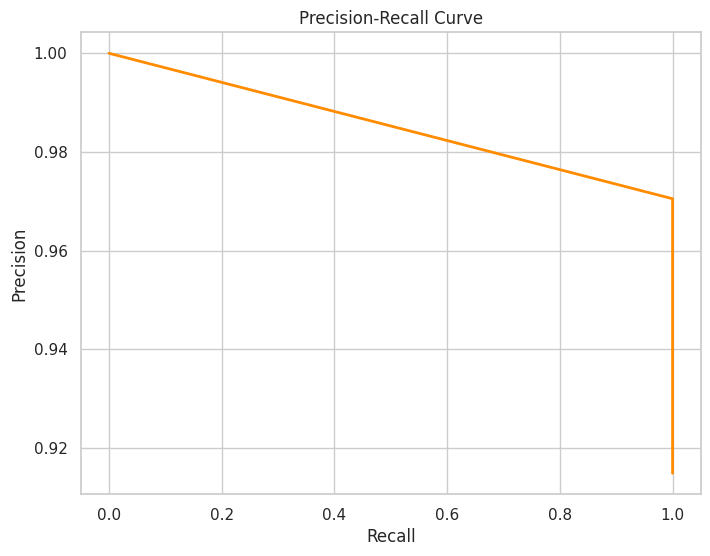

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Create a precision-recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

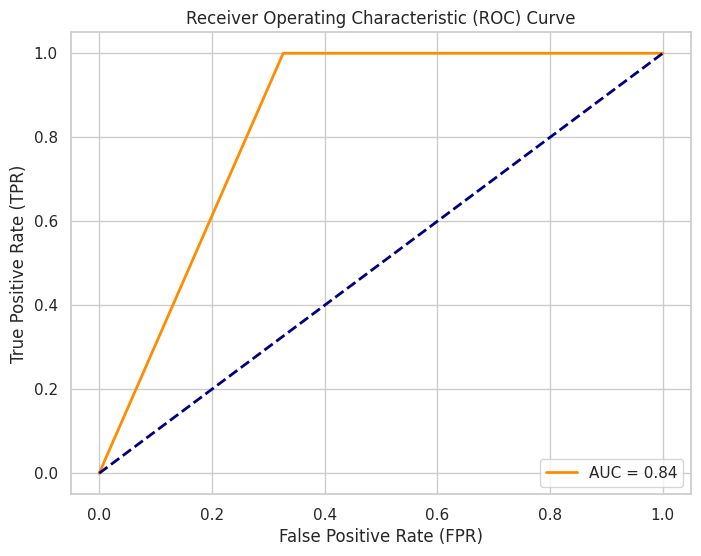

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**SUMMARY OF THE ANALYSIS**

**Data Preparation:** Loading the Google Play Store dataset, Accessing Datatypes.The target variable for the logistic regression model is defined based on the 'Type' column, where apps are labeled as 'Free' (1) or 'Paid' (0).

**Data Visualization:** Visualized our target (Paid or Unpaid) and how the target variable varied with respect to some of the features (customer rating, installs, reviews, category)

**Feature Engineering:** The analysis involves steps like label encoding,
which converts categorical data into a numerical format suitable for modeling. It also includes dropping missing values and irrelevant features to streamline the dataset for effective modeling.

**Model Building and Evaluation:** Two logistic regression models are constructed using sklearn. Each model is tested on a validation set, with various metrics calculated for performance evaluation. These metrics include Accuracy, Precision, Recall, F1 Score, and Confusion Matrix. Additionally, the analysis includes the creation of a Recall Curve and Receiver Operating Characteristic (ROC) curve along with the computation of the Area Under the Curve (AUC).

**Comparison of Models:** The analysis compares two logistic regression models. Model 2 is deemed superior based on a higher AUC -0.84, compared to only 0.50 for Model 1, indicating better overall performance in classifying the apps. While the first model performed well for class 1 (Free apps), it was less effective for class 0 (Paid apps). In contrast, Model 2 showed improved performance for both classes. The confusion matrix for Model 2 shows a significant reduction in False Positives and False Negatives, along with an increase in True Positives and True Negatives.

**Conclusion:** The analysis concludes that Model 2 is more effective for the classification task in the context of the Google Play Store dataset. This conclusion is supported by its higher AUC score, higher precision and accuracy and better-balanced performance across both target classes.
**Hence, For Model 2 Area under the curve is 0.84 which is a good model for classification in positive and negative classes.**